# Modelos de ajuste a una distribución
En este ejercicio
- Realizaremos el histograma y ajuste a una distribución exponencial.
- Calcularemos la bondad del ajuste basado en el test de Kolmogorov-Smirnov
- Realizaremos la gráfica QQ-Plot frente a una distribución exponencial.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

Importamos la base de datos de precios de casas de California

In [ ]:
df = pd.read_feather('../data/03_model_input/california_housing_clean.ftr')
datos = df.AveRooms.copy()

Ajustamos una distribución lognormal a los datos

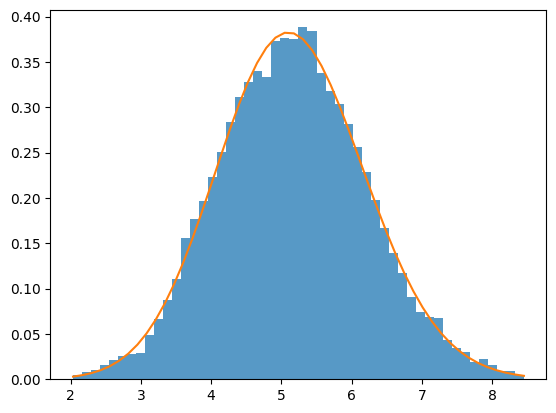

In [ ]:
shape, loc, scale = st.lognorm.fit(datos)
lognormal = st.lognorm(shape, loc=loc, scale=scale)

Mostramos el histograma con el ajuste lognormal superpuesto

In [ ]:
plt.hist(datos, bins=50, density=True, alpha=0.75)
x = np.linspace(datos.min(), datos.max(), 50)
y = st.lognorm.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, y)
plt.show()

Comprobamos la bondad del ajuste con el test de Kolmogorov-Smirnov

In [109]:
kstest = st.kstest(datos, cdf='lognorm', args=(shape, loc, scale))
print(kstest)

KstestResult(statistic=np.float64(0.005832606096551368), pvalue=np.float64(0.630407080886187), statistic_location=np.float64(4.414388489208633), statistic_sign=np.int8(1))


Generamos el gráfico QQ-Plot para comparar los cuantiles observados y teóricos.

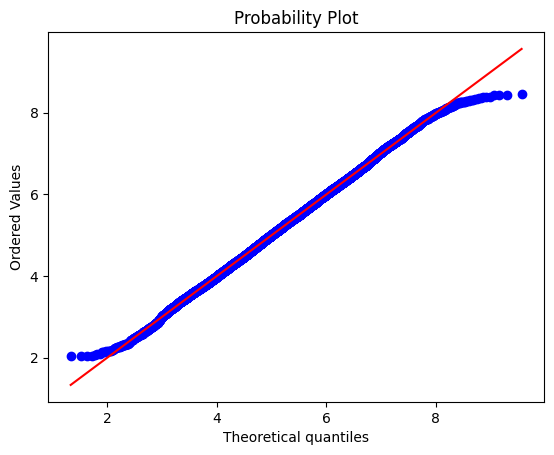

In [110]:
st.probplot(datos, dist=st.lognorm, sparams=(shape, loc, scale), plot=plt)
plt.show()

Si bien observamos que el ajuste en los percentiles centrales es bueno, vemos que en los extremos la distribución lognormal no ajusta tan bien a los datos. En este caso, la recomendación sería seguir buscando una distribución con mayor ajuste.